Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

  Sequence_Name   mcg   gvh   alm   mit  erl  pox   vac   nuc  \
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   

  localization_site  
0               MIT  
1               MIT  
2               MIT  
3               NUC  
4               MIT  
Features shape: (1484, 8)
Target shape: (1484,)
Columns with string values: Index(['Sequence_Name', 'localization_site'], dtype='object')


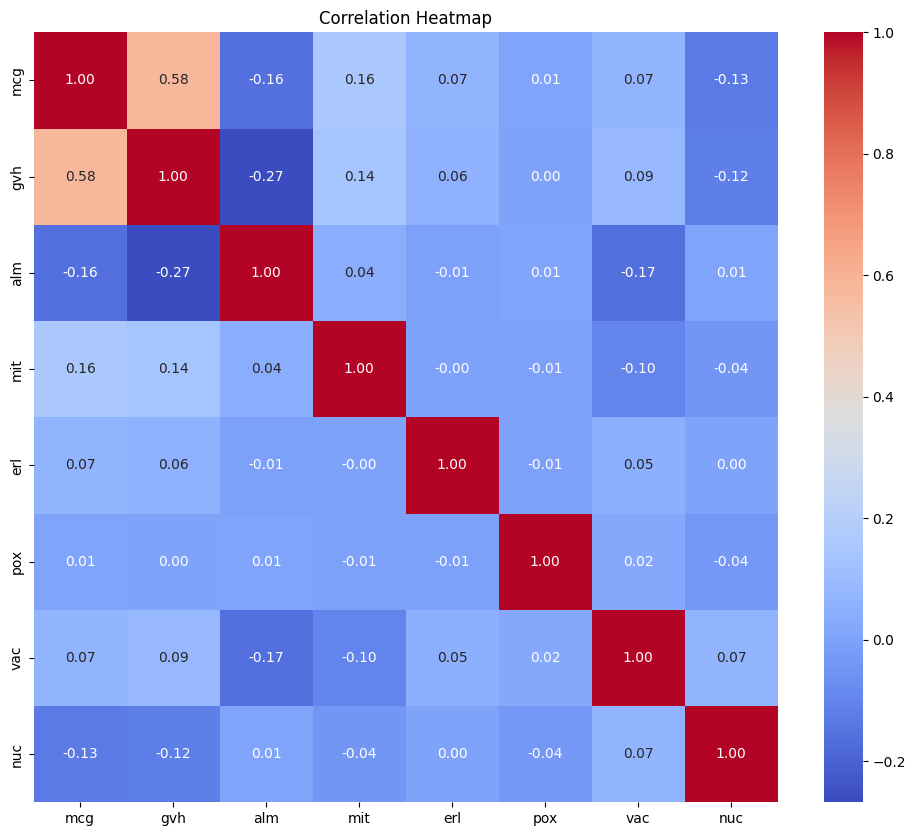

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

file_path = "yeast.data"

column_names = [
    "Sequence_Name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "localization_site"
]

yeast_df = pd.read_csv(file_path, header=None, names=column_names, delim_whitespace=True)

print(yeast_df.head())

# Features: All columns except 'Sequence_Name' and 'localization_site'
X = yeast_df.drop(columns=['Sequence_Name', 'localization_site'])

# Target: 'localization_site' column
y = yeast_df['localization_site']

# Display the shape of features and target
print("Features shape:", X.shape)
print("Target shape:", y.shape)

columns_with_strings = yeast_df.select_dtypes(include=['object']).columns
print("Columns with string values:", columns_with_strings)

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
X_encoded = X.apply(label_encoder.fit_transform)
correlation_matrix = X_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [17]:
# Calculate the correlation between each feature and the target label
correlation_with_target = X_encoded.corrwith(X.iloc[:, -1])

# Get the absolute correlation values
absolute_correlation = correlation_with_target.abs()

# Sort the correlation values in descending order
sorted_correlation = absolute_correlation.sort_values(ascending=False)

# Get the top 5 correlated features
top_correlated_features = sorted_correlation.head(5)

print("Top 5 correlated features with the target label:")
print(top_correlated_features)

Top 5 correlated features with the target label:
nuc    0.994498
mcg    0.124548
gvh    0.102823
vac    0.089671
mit    0.055116
dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [18]:
from sklearn.model_selection import train_test_split

# Map the label column to 0s and 1s
y_mapped = X_encoded.iloc[:, -1].map({'yes': 1, 'no': 0})

# Splitting the data into features and labels
X = X_encoded  # Features
y = y_mapped  # Labels

# Splitting the data into training and test sets (90% for training, 10% for testing)
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Printing the shapes of the resulting datasets
print("Shape of X_train_cv:", X_train_cv.shape)
print("Shape of y_train_cv:", y_train_cv.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_cv: (1335, 8)
Shape of y_train_cv: (1335,)
Shape of X_test: (149, 8)
Shape of y_test: (149,)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline with StandardScaler and KNN model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for scaling the features
    ('knn', KNeighborsClassifier())  # KNN model
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
# Define the parameter grid for KNN
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11]  # Various values of k
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Drop rows with missing values from both X_train_cv and y_train_cv
X_train_cv_clean = X_train_cv.dropna()
y_train_cv_clean = y_train_cv[X_train_cv_clean.index]

imputer = SimpleImputer(strategy='mean')
y_train_cv_clean = imputer.fit_transform(y_train_cv.values.reshape(-1, 1)).flatten()

# Perform the grid search with the cleaned data
grid_search.fit(X_train_cv_clean, y_train_cv_clean)

# Report back the best performing parameters
print("Best parameters:", grid_search.best_params_)

C:\Users\Andrea Chiang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1335, 0]

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

: o

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Fit the grid search on the training data
grid_search.fit(X_train_cv_clean, y_train_cv_clean)

# Use the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Predict the labels for the test set
y_pred = best_estimator.predict(X_test)

# Get the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [1335, 0]